### Tóm Tắt Bi-LSTM Train (**70%**) Test (**30%**)
---
* Data:  **2680** rows × **1** columns
* pochs: **10**
* Dùng **1 năm** ~ **365 ngày** để dự đoán giá của ngày tiếp theo
* Batch_size: **60**
---
###Kết Quả:
* MAPE: **6.55%**
* RMSE: **3038684**

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional


from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
df = pd.read_csv('Data-Gold.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)
df_VND = df['VND'].values.reshape(-1, 1)

df

,VND
Date,
2012-01-02,32202288.50
2012-01-03,33607538.00
2012-01-04,33923003.00
2012-01-05,33628569.00
2012-01-06,34000652.75
...,...
2022-12-26,41586906.00
2022-12-27,41894838.00
2022-12-28,41727084.00


# Vẽ đồ thị

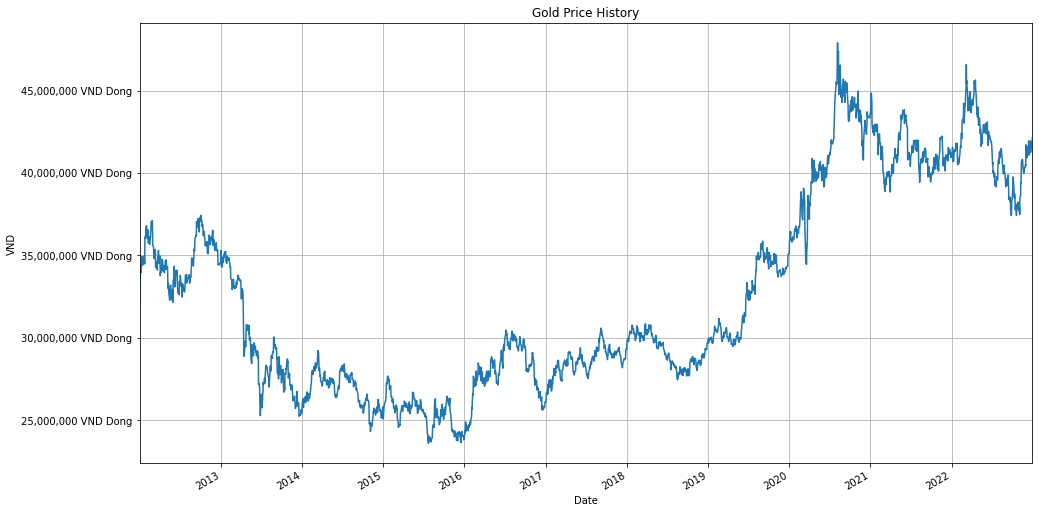

In [ ]:
formatter = ticker.StrMethodFormatter('{x:,.0f} VND Dong')

title = 'Gold Price History'
ylabel = 'VND'
xlabel = 'Date'

ax = df['VND'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

In [ ]:
gold_price=df['VND']
values=gold_price.values
Train_len=math.ceil(len(values)*0.9)
Train_len

2583

### Trực chuẩn hoá dữ liệu

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
scaled_data=sc.fit_transform(df)
scaled_data

array([[0.35425019],
       [0.4120421 ],
       [0.42501583],
       ...,
       [0.74596438],
       [0.75560409],
       [0.76288112]])

### Create Training & Testing Data

In [ ]:
train_data=scaled_data[0:Train_len,:]

train_x=[]
train_y=[]

for i in range(365, len(train_data)):  # 1 years
  train_x.append(train_data[i-365:i,0])
  train_y.append(train_data[i,0])

train_x,train_y=np.array(train_x), np.array(train_y)

train_x=np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))


In [ ]:
# Create the testing data
test_data=scaled_data[Train_len-365:,:]
test_x=[]
test_y=df[Train_len:]
for i in range (365, len(test_data)):
  test_x.append(test_data[i-365:i,0])
test_x=np.array(test_x)
test_x=np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

### Xây dựng model

In [ ]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True,input_shape=(train_x.shape[1],1))))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# compile model
model.compile(loss='mse', optimizer='adam', metrics=['acc'])
# fit model
m=model.fit(train_x, train_y,batch_size= 32, epochs=50)

Epoch 1/50
70/70 [==============================] - 110s 1s/step - loss: 0.0050 - acc: 9.0171e-04
Epoch 2/50
70/70 [==============================] - 93s 1s/step - loss: 5.3109e-04 - acc: 9.0171e-04
Epoch 3/50
70/70 [==============================] - 92s 1s/step - loss: 4.9189e-04 - acc: 9.0171e-04
Epoch 4/50
70/70 [==============================] - 92s 1s/step - loss: 5.2727e-04 - acc: 9.0171e-04
Epoch 5/50
70/70 [==============================] - 93s 1s/step - loss: 4.4545e-04 - acc: 9.0171e-04
Epoch 6/50
70/70 [==============================] - 93s 1s/step - loss: 3.7986e-04 - acc: 9.0171e-04
Epoch 7/50
70/70 [==============================] - 95s 1s/step - loss: 3.6229e-04 - acc: 9.0171e-04
Epoch 8/50
70/70 [==============================] - 95s 1s/step - loss: 3.3918e-04 - acc: 9.0171e-04
Epoch 9/50
70/70 [==============================] - 95s 1s/step - loss: 3.2727e-04 - acc: 9.0171e-04
Epoch 10/50
70/70 [==============================] - 95s 1s/step - loss: 3.0794e-04 - acc: 9.0

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'acc'])

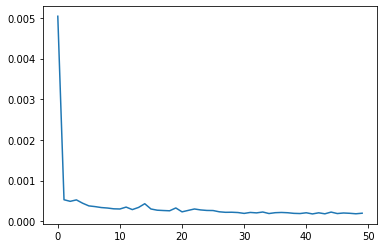

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
model.save("GoldPrice_bilstm_7_3.h5")

In [ ]:
Predictions= model.predict(test_x)
Predictions=sc.inverse_transform(Predictions)

9/9 [==============================] - 5s 385ms/step


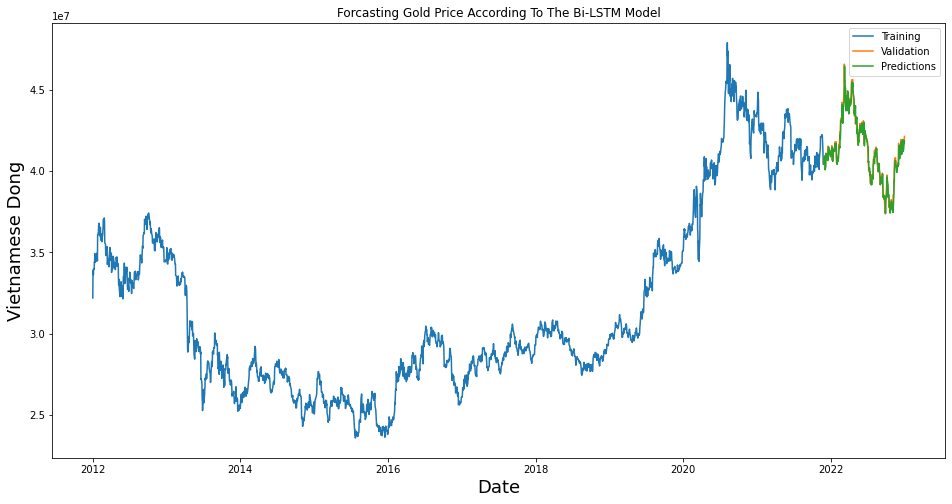

In [ ]:
#plot data
train=df[:Train_len]
validation=df[Train_len:]
validation['Predictions']= Predictions
#visualize data
plt.figure(figsize=(16,8))
plt.title('Forcasting Gold Price According To The Bi-LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Vietnamese Dong',fontsize=18)
plt.plot(train['VND'])
plt.plot(validation[['VND','Predictions']])
plt.legend(['Training','Validation','Predictions'])
plt.show()

In [ ]:
validation

,VND,Predictions
Date,,
2021-11-25,40546299.04,40420472.0
2021-11-26,40840344.31,40598936.0
2021-11-29,40523204.39,40907112.0
2021-11-30,40948149.18,40590880.0
2021-12-01,40642813.75,40900380.0
...,...,...
2022-12-26,41586906.00,41331280.0
2022-12-27,41894838.00,41538016.0
2022-12-28,41727084.00,41863228.0


In [ ]:
data=validation['VND']

In [ ]:
data

Date
2021-11-25    40546299.04
2021-11-26    40840344.31
2021-11-29    40523204.39
2021-11-30    40948149.18
2021-12-01    40642813.75
                 ...     
2022-12-26    41586906.00
2022-12-27    41894838.00
2022-12-28    41727084.00
2022-12-29    41961480.00
2022-12-30    42138426.00
Name: VND, Length: 287, dtype: float64

In [ ]:
mae = mean_absolute_error(data, Predictions)
mape = mean_absolute_percentage_error(data, Predictions)
mse = mean_squared_error(data, Predictions)
rmse = np.sqrt(mse)
r2 = r2_score(data, Predictions)
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.0f}")

MAPE: 0.73%
RMSE: 403701


In [ ]:
Last_half_year=df[-548:].values
Last_half_year_scaled=sc.transform(Last_half_year)
x_test=[]
x_test.append(Last_half_year_scaled)
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(1, 548, 1)

In [ ]:
model.reset_states()
pred_price=model.predict(x_test)
pred_price=sc.inverse_transform(pred_price)
print(pred_price) #2022-08-05

1/1 [==============================] - 3s 3s/step
[[42059968.]]


In [ ]:
len(test_data)

652

In [ ]:
#Getting the last 100 days records
future=test_data[552:]

In [ ]:
future=future.reshape(1,-1)
temp=list(future)
future.shape

(1, 100)

In [ ]:
#Creating list of the last 600 data
temp=temp[0].tolist()

In [ ]:
#Predicting next 30 days price uisng the current data
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp)>100):
        future = np.array(temp[1:])
        future=future.reshape(1,-1)
        future = future.reshape((1, n_steps, 1))
        yhat = model.predict(future, verbose=0)
        temp.extend(yhat[0].tolist())
        temp = temp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        future = future.reshape((1, n_steps,1))
        yhat = model.predict(future, verbose=0)
        temp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[[0.7600336670875549], [0.757377564907074], [0.7539637088775635], [0.7508436441421509], [0.7483960390090942], [0.7466005086898804], [0.7452710866928101], [0.7441712617874146], [0.7431294918060303], [0.7420239448547363], [0.7408197522163391], [0.739523708820343], [0.7381708025932312], [0.7367855906486511], [0.7354085445404053], [0.7340592741966248], [0.7327629923820496], [0.7315129041671753], [0.7303244471549988], [0.7291855216026306], [0.7280879020690918], [0.7270346283912659], [0.7260048389434814], [0.7249998450279236], [0.723992645740509], [0.7229831218719482], [0.7219600677490234], [0.7209053635597229], [0.7198067307472229], [0.7186687588691711]]


In [ ]:
tam=sc.inverse_transform(lst_output)
print(tam)

[[42069188.21399622]
 [42004603.29368713]
 [41921593.07622153]
 [41845726.5927042 ]
 [41786211.4190681 ]
 [41742551.88539837]
 [41710226.09071739]
 [41683483.10455108]
 [41658151.76311304]
 [41631269.64153203]
 [41601988.88337476]
 [41570474.71194617]
 [41537577.88233405]
 [41503895.51735979]
 [41470411.71021692]
 [41437603.28956621]
 [41406083.32082868]
 [41375686.58069938]
 [41346788.44493251]
 [41319094.70009912]
 [41292405.33904056]
 [41266794.27744588]
 [41241754.25078236]
 [41217317.14424919]
 [41192826.41260826]
 [41168279.15720512]
 [41143402.90451931]
 [41117757.05907097]
 [41091043.05944938]
 [41063372.50385176]]


In [ ]:
len(tam)

30

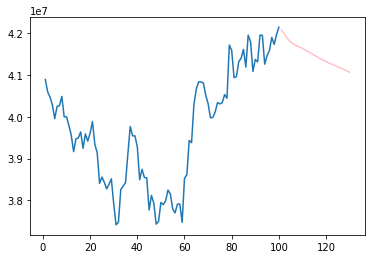

In [ ]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)
plt.plot(plot_new, sc.inverse_transform(scaled_data[2770:]))
plt.plot(plot_pred, sc.inverse_transform(lst_output),c='pink')

In [ ]:
dataset_new=scaled_data.tolist()

In [ ]:
len(dataset_new)

2870

In [ ]:
#Entends helps us to fill the missing value with approx value
dataset_new.extend(lst_output)

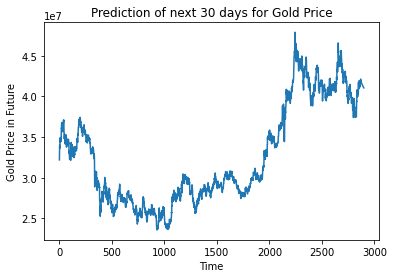

In [ ]:
final=sc.inverse_transform(dataset_new).tolist()

plt.ylabel("Gold Price in Future")
plt.xlabel("Time")
plt.title("Prediction of next 30 days for Gold Price")
plt.plot(final,)
plt.show()